In [23]:
greetings = "Assalam-o-Alaikum!"
greetings

'Assalam-o-Alaikum!'

### Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

In [114]:
# dataset
df = pd.read_csv("student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Statistical Analysis

In [26]:
# statistical description
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [27]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [28]:
# shape
df.shape

(25, 2)

In [29]:
# data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [30]:
# total rows
df.count()

Hours     25
Scores    25
dtype: int64

Text(0, 0.5, 'Scors')

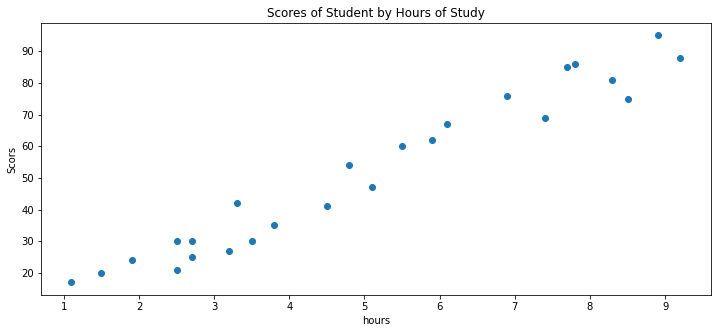

In [31]:
# scatter plot
plt.figure(figsize = (12, 5))
plt.scatter(x = "Hours", y = "Scores", data = df)
plt.title("Scores of Student by Hours of Study")
plt.xlabel("hours")
plt.ylabel("Scors")

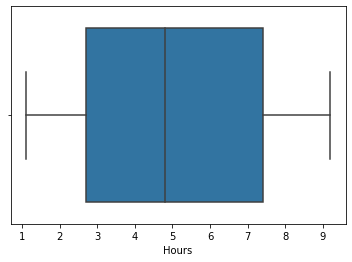

In [32]:
# Most of Students Study Between 2.7 to 7.4 Hours
sns.boxplot(x = df["Hours"])

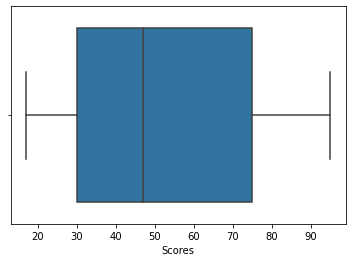

In [33]:
# Most Students have score between 30 to 75
sns.boxplot(x = df["Scores"])

In [34]:
# First 25%
Q1 = df.quantile(0.25)
Q1

Hours      2.7
Scores    30.0
Name: 0.25, dtype: float64

In [35]:
# Second 50%
Q2 = df.quantile(0.50)
Q2

Hours      4.8
Scores    47.0
Name: 0.5, dtype: float64

In [36]:
# Third 75%
Q3 = df.quantile(0.75)
Q3

Hours      7.4
Scores    75.0
Name: 0.75, dtype: float64

In [37]:
# InterQuantile Range
IQR = Q3 - Q1
IQR

Hours      4.7
Scores    45.0
dtype: float64

Text(0.5, 1.0, 'Frequecy of Hours of study')

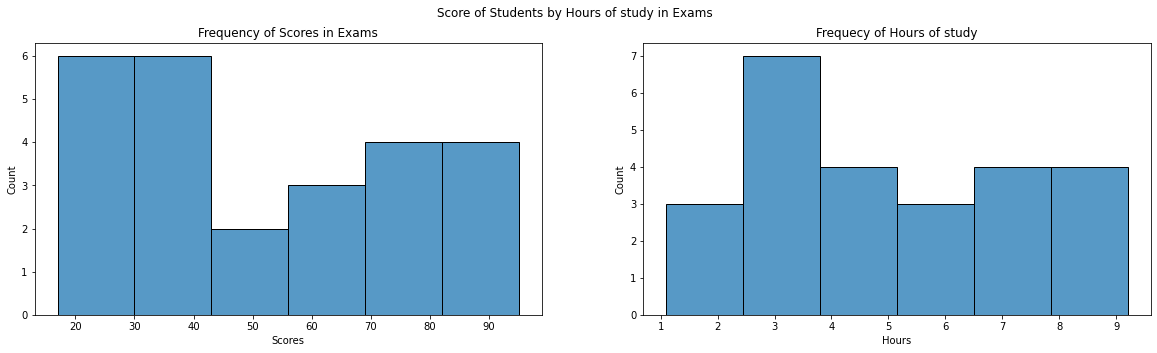

In [38]:
# Histogram of Exam Scores and Study Hours
fig, axes = plt.subplots(1, 2, figsize = (20, 5))
fig.suptitle("Score of Students by Hours of study in Exams")
sns.histplot(ax = axes[0], data = df, x = "Scores")
axes[0].set_title("Frequency of Scores in Exams")
sns.histplot(ax = axes[1], data = df, x = "Hours")
axes[1].set_title("Frequecy of Hours of study")

In [39]:
# Pass : Numbers > 50
df["Status"] = df["Scores"] > 50
df.head()

,Hours,Scores,Status
0,2.5,21,False
1,5.1,47,False
2,3.2,27,False
3,8.5,75,True
4,3.5,30,False


In [40]:
# Replace
df["Status"].replace([True, False], ["Pass", "Fail"], inplace = True)
df.head()

,Hours,Scores,Status
0,2.5,21,Fail
1,5.1,47,Fail
2,3.2,27,Fail
3,8.5,75,Pass
4,3.5,30,Fail


In [41]:
# Dummies
dummy = pd.get_dummies(df["Status"])
df = pd.concat([df, dummy], axis = 1)
df.drop("Status", axis = 1, inplace = True)
df.head()

,Hours,Scores,Fail,Pass
0,2.5,21,1,0
1,5.1,47,1,0
2,3.2,27,1,0
3,8.5,75,0,1
4,3.5,30,1,0


In [42]:
Total_Students = df.shape[0]
Total_Students

25

In [43]:
Pass_Students = df["Pass"].sum()
print("Total Number of Passed Students are " + str(Pass_Students))

Total Number of Passed Students are 12


In [44]:
Failed_Students = df["Fail"].sum()
print("Total Number of Failed Students are " + str(Failed_Students))

Total Number of Failed Students are 13


In [45]:
Pass_Percentage = (Pass_Students / Total_Students) * 100
Pass_Percentage

48.0

In [46]:
Fail_Percentage = (Failed_Students / Total_Students) * 100
Fail_Percentage

52.0

In [57]:
ratio = Pass_Percentage / Fail_Percentage
print("Success to Fail Ratio ratio = " + str(ratio))

Success to Fail Ratio ratio = 0.9230769230769231


### Correlation

In [61]:
## Pearson Correlation
pearson_coef, p_value = stats.pearsonr(df["Scores"], df["Hours"])
print("Pearson Coefficient: ", pearson_coef)
print("p_value : ", p_value)

Pearson Coefficient:  0.9761906560220887
p_value :  9.132624467459357e-17


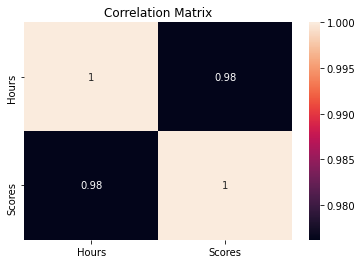

In [71]:
df2 = df.iloc[:, 0:2]
correlation = df2.corr()
sns.heatmap(correlation, annot = True)
plt.title("Correlation Matrix")
plt.show()

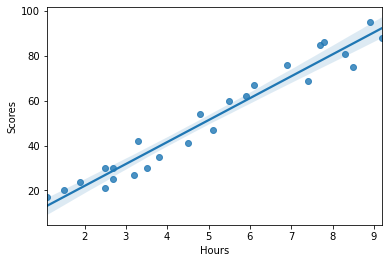

In [72]:
# Scatter Plot
sns.regplot(x = "Hours", y = "Scores", data = df)
plt.show()

In [52]:
df["Status"] = df["Scores"] > 50

In [53]:
df["Status"].replace([True, False], ["Pass", "Fail"], inplace = True)
df.head()

,Hours,Scores,Fail,Pass,Status
0,2.5,21,1,0,Fail
1,5.1,47,1,0,Fail
2,3.2,27,1,0,Fail
3,8.5,75,0,1,Pass
4,3.5,30,1,0,Fail


In [54]:
# Pivot Table
df_group1 = df[["Status", "Hours", "Scores"]]
x = df_group1.groupby(["Status", "Hours"])
x.first()

Scores
Status Hours        
Fail   1.1        17
       1.5        20
       1.9        24
       2.5        21
       2.7        25
       3.2        27
       3.3        42
       3.5        30
       3.8        35
       4.5        41
       5.1        47
Pass   4.8        54
       5.5        60
       5.9        62
       6.1        67
       6.9        76
       7.4        69
       7.7        85
       7.8        86
       8.3        81
       8.5        75
       8.9        95
       9.2        88

In [55]:
df_group2 = df[["Status", "Hours", "Scores"]]
y = df_group2.groupby(["Status", "Scores"])
y.first()

Hours
Status Scores       
Fail   17        1.1
       20        1.5
       21        2.5
       24        1.9
       25        2.7
       27        3.2
       30        3.5
       35        3.8
       41        4.5
       42        3.3
       47        5.1
Pass   54        4.8
       60        5.5
       62        5.9
       67        6.1
       69        7.4
       75        8.5
       76        6.9
       81        8.3
       85        7.7
       86        7.8
       88        9.2
       95        8.9

### Linear Regression

In [115]:
# train test split
a = df[["Hours"]]
b = df["Scores"]

x_train, x_test, y_train, y_test = train_test_split(a, b, test_size = 0.2, random_state = 0)

lr = LinearRegression()
lr.fit(x_train, y_train)

y_predict = lr.predict(x_train)
print(y_predict)

[39.67865467 20.84840735 79.32128059 70.40168976 12.91988217 52.56250809
 78.33021494 34.72332643 84.27660883 93.19619966 62.47316457 36.70545772
 28.77693254 56.52677068 28.77693254 86.25874013 26.79480124 49.58931115
 90.22300272 46.6161142 ]


In [116]:
training_score = lr.score(x_train, y_train)
print("Score pf Training Model = ", training_score) 

Score pf Training Model =  0.9515510725211552


In [117]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_train, 'Predicted': y_predict})  
df 

,Actual,Predicted
22,35,39.678655
17,24,20.848407
24,86,79.321281
23,76,70.401690
14,17,12.919882
1,47,52.562508
10,85,78.330215
13,42,34.723326
8,81,84.276609
6,88,93.196200


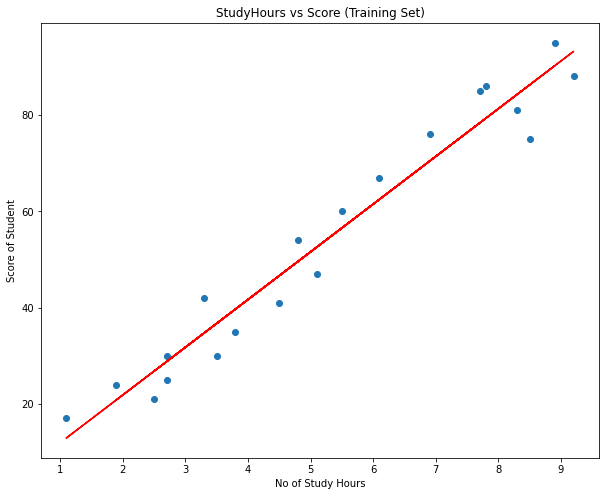

In [118]:
#drawing the best fit Line on the training set :
fig = plt.figure(figsize = (10, 8))
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predict, c = "r")
plt.xlabel("No of Study Hours")
plt.ylabel("Score of Student")
plt.title("StudyHours vs Score (Training Set)")
plt.show()

D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


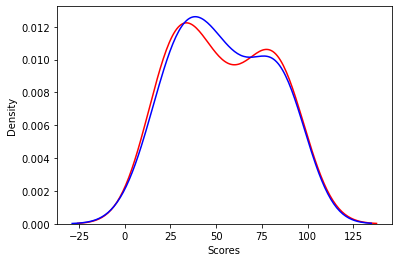

In [119]:
sns.distplot(a = y_train, hist = False, color = "r")
sns.distplot(a = y_predict, hist = False, color = "b")

### Test Set Prediction

In [120]:
# Prediction
y_test_predict = lr.predict(x_test)
print(y_test_predict)

[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [121]:
# Score
test_score = lr.score(x_test, y_test)
test_score

0.9454906892105356

In [122]:
Comp=pd.DataFrame({'Actual':y_test,'predicted':y_test_predict})
Comp

,Actual,predicted
5,20,16.884145
2,27,33.732261
19,69,75.357018
16,30,26.794801
11,62,60.491033


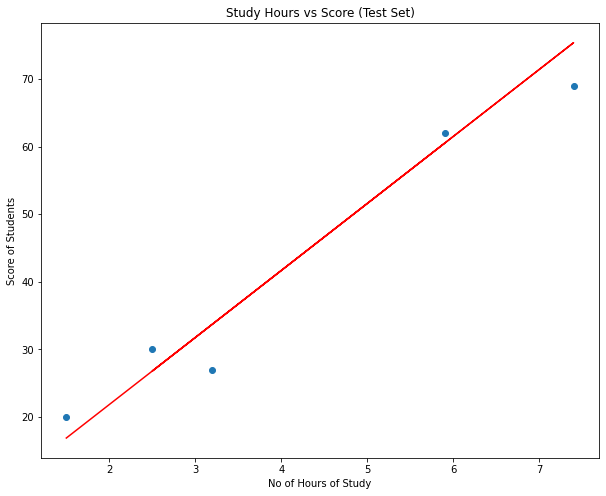

In [123]:
fig = plt.figure(figsize = (10, 8))
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_predict, c = "r")
plt.xlabel("No of Hours of Study")
plt.ylabel("Score of Students")
plt.title("Study Hours vs Score (Test Set)")
plt.show()

D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\New folder\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


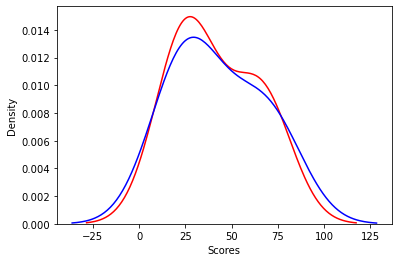

In [124]:
sns.distplot(a = y_test, hist = False, color = "r", label = "Actual Values")
sns.distplot(a = y_test_predict, hist = False, color = "b", label = "Predicted Values")

In [125]:
# Prediction
hours = 9.25
score = lr.predict([[hours]])
print("No of Hours " + str(hours))
print("Predicted Score = " + str(score[0]))

No of Hours 9.25
Predicted Score = 93.69173248737538


In [126]:
# Mean Squared Error
mse = metrics.mean_absolute_error(y_test, y_test_predict)
mse

4.183859899002975